In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
nashville = pd.read_csv('/Users/brandoncoughlin/Desktop/NSS/DA12/capstone/nashville-growth/data/building_permits_issued.csv')

In [48]:
nashville

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,Subdivision Lot,Contact,Permit Type,Permit SubType,IVR Tracking,Purpose,Council District,Census Tract,Longitude,Latitude,ObjectId,Zip Code,x,y
0,2018034633,Building Residential - New,"Accessory Structure, Pools - Residential",16800024100,6/15/18 5:00,6/6/22 5:00,5700,9025 HESTER BEASLEY RD,NASHVILLE,TN,W OF HESTER BEASLEY RD S OF HWY 100,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARN,CAA14U017,3525071,TO INSTALL A NEW ABOVE GROUND ROUND 24 ft POOL...,35,37018302.0,-87.000154,36.024237,1,37221,-9684812.886,4303956.903
1,2018074894,Building Commercial - New,"Self Service Storage, Storage Mod Hazard",17500008500,11/29/18 6:00,1/21/22 6:00,8001811,4119 MURFREESBORO PIKE,ANTIOCH,TN,W SIDE MURFREESBORO PK & N OF L & N R R,"CONSECO GROUP INC, THE",CACN,CAF21S001,3582717,to construct a three floor self storage buildi...,32,37015630.0,-86.595138,36.032201,2,37013,-9639726.630,4305053.110
2,2019015332,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",10404017300,3/15/19 5:00,12/9/21 6:00,21960364,1005 16TH AVE S,NASHVILLE,TN,PT LOTS 1 2 3 4 SHIELDS SUB 5 6 ROKEBY,"ANDERSON, R G CO INC",CACN,CAA03R399,3629991,"to construct a 72,772 sf mixed use building wi...",17,37016400.0,-86.792689,36.146449,3,37212,-9661717.906,4320791.252
3,2019052492,Building Use & Occupancy,"Multifamily, Tri-Plex, Quad, Apartments",09207033900,8/30/19 5:00,3/23/22 5:00,50,640 21ST AVE N,NASHVILLE,TN,PT LTS 39-42 W B COOPERS ADDN & ADDITIONAL ACR...,"WP TENNESSEE BUILDERS, LLC",CAUO,CAA03R398,3707454,master permit no construction this permit con...,21,37014400.0,-86.805831,36.159317,4,37203,-9663180.855,4322565.299
4,2019058786,Building Use & Occupancy,"Multifamily, Townhome",082120R90000CO,9/26/19 5:00,9/7/22 5:00,50,119 E NEILL AVE,NASHVILLE,TN,COMMON AREA HOMES AT 119 NEILL AVENUE,HARPETH VALLEY HOMES LLC,CAUO,CAA03R301,3716522,Master permit for Neill Avenue Townhomes with ...,5,37011900.0,-86.758634,36.177835,5,37206,-9657927.015,4325118.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32201,2024087813,Building Sign Permit,Sign - Ground / Wall Signs,09202000200,9/27/24 5:00,9/27/24 5:00,217600,1107 ED TEMPLE BLVD SIGN ACROS,NASHVILLE,TN,P/O LOTS 7 THRU 12 BLK 1 MIDWAY,JARVIS AWARD SIGN AND FLAG CO,CASN,CAZ02A001,4591244,"To erect/replace 1 illuminated, 417sqft, pylon...",21,37013602.0,-86.821419,36.168904,32202,37208,-9664916.178,4323887.267
32202,T2022070823,Building Residential - New,Pool without a fence,11512010100,10/18/22 5:00,10/26/22 5:00,0,6044 B BRESSLYN RD,NASHVILLE,TN,LOT 14 RESUB. OF WEST MEADE VILLAGE,gene kulas,CARN,CAAPOOLFC,4219223,to construct 20x40 swimming pool with hot tub ...,23,37018203.0,-86.878708,36.113343,32203,37205,-9671293.589,4316228.471
32203,T2023042807,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00100CO,6/29/23 5:00,6/29/23 5:00,5000,1042 A2 SCOVEL ST,NASHVILLE,TN,UNIT A 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343181,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32204,37208,-9662280.302,4324433.046
32204,T2023042806,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00200CO,6/29/23 5:00,6/29/23 5:00,5000,1042 B2 SCOVEL ST,NASHVILLE,TN,UNIT B 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343180,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32205,37208,-9662280.302,4324433.046


In [49]:
# duplicate_address = nashville[nashville.duplicated(subset = ['address'], keep=False)]
# print(duplicate_address)

In [50]:
nashville.columns = [x.lower() for x in nashville.columns]

In [51]:
# create a df that shows groups of zip codes to segment them into neighborhoods (North, South, East, West Nashville).

zipcode_count = nashville['zip code'].nunique()
zipcode_count
zipcode_list = nashville['zip code'].unique()
zipcode_list

array([37221, 37013, 37212, 37203, 37206, 37211, 37115, 37208, 37209,
       37218, 37080, 37138, 37210, 37228, 37207, 37214, 37204, 37205,
       37072, 37216, 37217, 37189, 37201, 37076, 37215, 37027, 37220,
       37122, 37135,  6209, 37219, 37143, 37213, 37015, 36215, 37086,
       37232,     0, 37240, 37238, 37246, 37064])

In [52]:
# create a df that shows groups of zip codes to segment them into neighborhoods (North, South, East, West).

# from the new df, get a count for each of the different types of permit codes ('permit type'). 

# that new df will enable me to make visuals of permit distributions, pie charts, etc. 

# define a function to assign county quadrant based on the zip
def assign_quadrant(zip_code):
    if str(zip_code).startswith(('37207', '37208', '37218', '37228', '37115', '37080', '37138', '37072', '37189')):
        return 'Northern Davidson County'
    elif str(zip_code).startswith(('37211', '37215', '37027', '37210', '37135', '37086', '37232', '37240')):
        return 'Southern Davidson County'
    elif str(zip_code).startswith(('37206', '37216', '37214', '37217', '37076', '37122')):
        return 'Eastern Davidson County'
    elif str(zip_code).startswith(('37205', '37209', '37212', '37221', '37013', '37203', '37204', '37201', '37202', '37219', '37220', '37143', '37015')):
        return 'Western Davidson County'
    elif str(zip_code).startswith(('37213', '37238', '37246')):
        return 'Downtown Nashville'
    else:
        return 'Other'

nashville['Davidson County Quadrant'] = nashville['zip code'].apply(assign_quadrant)

# Get a list of zip codes that do not fit into any of my categories.
#unclassified_zip_codes = nashville[nashville['Neighborhood'] == 'Other']['zip code'].drop_duplicates().reset_index(drop=True)

In [53]:
zipcode_list

array([37221, 37013, 37212, 37203, 37206, 37211, 37115, 37208, 37209,
       37218, 37080, 37138, 37210, 37228, 37207, 37214, 37204, 37205,
       37072, 37216, 37217, 37189, 37201, 37076, 37215, 37027, 37220,
       37122, 37135,  6209, 37219, 37143, 37213, 37015, 36215, 37086,
       37232,     0, 37240, 37238, 37246, 37064])

In [54]:
# I want to narrow this down even more to specific neighborhoods for each zip code

# define a function to assign neighborhoods based on the zip
def assign_neighborhood(zip_code):
    if str(zip_code).startswith(('37221')):
        return 'Bellevue'
    elif str(zip_code).startswith(('37013')):
        return 'Antioch'
    elif str(zip_code).startswith(('37212')):
        return 'West End'
    elif str(zip_code).startswith(('37203')):
        return 'The Gulch'
    elif str(zip_code).startswith(('37206')):
        return 'East Nashville'
    elif str(zip_code).startswith(('37211')):
        return 'Nolensville'
    elif str(zip_code).startswith(('37115')):
        return 'Madison'
    elif str(zip_code).startswith(('37208')):
        return 'Germantown'
    elif str(zip_code).startswith(('37209')):
        return 'West Nashville'
    elif str(zip_code).startswith(('37218')):
        return 'Bordeaux'
    elif str(zip_code).startswith(('37080')):
        return 'Joelton'
    elif str(zip_code).startswith(('37138')):
        return 'Old Hickory'
    elif str(zip_code).startswith(('37210')):
        return 'Napier'
    elif str(zip_code).startswith(('37228')):
        return 'Metro Center'
    elif str(zip_code).startswith(('37207')):
        return 'McFerrin Park'
    elif str(zip_code).startswith(('37214')):
        return 'Donelson'
    elif str(zip_code).startswith(('37204')):
        return '12 South'
    elif str(zip_code).startswith(('37205')):
        return 'Belle Meade'
    elif str(zip_code).startswith(('37072')):
        return 'Goodlettsville'
    elif str(zip_code).startswith(('37216')):
        return 'East Nashville'
    elif str(zip_code).startswith(('37217')):
        return 'Antioch'
    elif str(zip_code).startswith(('37189')):
        return 'Whites Creek'
    elif str(zip_code).startswith(('37201')):
        return 'Downtown'
    elif str(zip_code).startswith(('37076')):
        return 'Hermitage'
    elif str(zip_code).startswith(('37215')):
        return 'Green Hills'
    elif str(zip_code).startswith(('37027')):
        return 'Brentwood'
    elif str(zip_code).startswith(('37220')):
        return 'Crieve Hall'
    elif str(zip_code).startswith(('37122')):
        return 'Mount Juliet'
    elif str(zip_code).startswith(('37135')):
        return 'Nolensville'
    elif str(zip_code).startswith(('37219')):
        return 'Downtown'
    elif str(zip_code).startswith(('37143')):
        return 'Pegram'
    elif str(zip_code).startswith(('37213')):
        return 'East Bank'
    elif str(zip_code).startswith(('37015')):
        return 'Ashland City'
    elif str(zip_code).startswith(('37086')):
        return 'La Vergne'
    elif str(zip_code).startswith(('37232')):
        return 'Vanderbilt'
    elif str(zip_code).startswith(('37240')):
        return 'Vanderbilt'
    elif str(zip_code).startswith(('37238')):
        return 'Downtown'
    elif str(zip_code).startswith(('37064')):
        return 'Leipers Fork'
    elif str(zip_code).startswith(('37246')):
        return 'Downtown'
    else:
        return 'Other'

nashville['Neighborhood'] = nashville['zip code'].apply(assign_neighborhood)

In [55]:
other_neighborhoods = nashville[nashville['Neighborhood'] == 'Other']
other_neighborhood_zip_codes = other_neighborhoods['zip code'].unique()
other_neighborhood_zip_codes

array([ 6209, 36215,     0])

In [56]:
all_zipcodes = nashville['zip code'].unique()

In [57]:
all_neighborhoods = nashville['Neighborhood'].unique()
all_neighborhoods

array(['Bellevue', 'Antioch', 'West End', 'The Gulch', 'East Nashville',
       'Nolensville', 'Madison', 'Germantown', 'West Nashville',
       'Bordeaux', 'Joelton', 'Old Hickory', 'Napier', 'Metro Center',
       'McFerrin Park', 'Donelson', '12 South', 'Belle Meade',
       'Goodlettsville', 'Whites Creek', 'Downtown', 'Hermitage',
       'Green Hills', 'Brentwood', 'Crieve Hall', 'Mount Juliet', 'Other',
       'Pegram', 'East Bank', 'Ashland City', 'La Vergne', 'Vanderbilt',
       'Leipers Fork'], dtype=object)

In [58]:
nashville

,permit #,permit type description,permit subtype description,parcel,date entered,date issued,construction cost,address,city,state,subdivision lot,contact,permit type,permit subtype,ivr tracking,purpose,council district,census tract,longitude,latitude,objectid,zip code,x,y,Davidson County Quadrant,Neighborhood
0,2018034633,Building Residential - New,"Accessory Structure, Pools - Residential",16800024100,6/15/18 5:00,6/6/22 5:00,5700,9025 HESTER BEASLEY RD,NASHVILLE,TN,W OF HESTER BEASLEY RD S OF HWY 100,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARN,CAA14U017,3525071,TO INSTALL A NEW ABOVE GROUND ROUND 24 ft POOL...,35,37018302.0,-87.000154,36.024237,1,37221,-9684812.886,4303956.903,Western Davidson County,Bellevue
1,2018074894,Building Commercial - New,"Self Service Storage, Storage Mod Hazard",17500008500,11/29/18 6:00,1/21/22 6:00,8001811,4119 MURFREESBORO PIKE,ANTIOCH,TN,W SIDE MURFREESBORO PK & N OF L & N R R,"CONSECO GROUP INC, THE",CACN,CAF21S001,3582717,to construct a three floor self storage buildi...,32,37015630.0,-86.595138,36.032201,2,37013,-9639726.630,4305053.110,Western Davidson County,Antioch
2,2019015332,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",10404017300,3/15/19 5:00,12/9/21 6:00,21960364,1005 16TH AVE S,NASHVILLE,TN,PT LOTS 1 2 3 4 SHIELDS SUB 5 6 ROKEBY,"ANDERSON, R G CO INC",CACN,CAA03R399,3629991,"to construct a 72,772 sf mixed use building wi...",17,37016400.0,-86.792689,36.146449,3,37212,-9661717.906,4320791.252,Western Davidson County,West End
3,2019052492,Building Use & Occupancy,"Multifamily, Tri-Plex, Quad, Apartments",09207033900,8/30/19 5:00,3/23/22 5:00,50,640 21ST AVE N,NASHVILLE,TN,PT LTS 39-42 W B COOPERS ADDN & ADDITIONAL ACR...,"WP TENNESSEE BUILDERS, LLC",CAUO,CAA03R398,3707454,master permit no construction this permit con...,21,37014400.0,-86.805831,36.159317,4,37203,-9663180.855,4322565.299,Western Davidson County,The Gulch
4,2019058786,Building Use & Occupancy,"Multifamily, Townhome",082120R90000CO,9/26/19 5:00,9/7/22 5:00,50,119 E NEILL AVE,NASHVILLE,TN,COMMON AREA HOMES AT 119 NEILL AVENUE,HARPETH VALLEY HOMES LLC,CAUO,CAA03R301,3716522,Master permit for Neill Avenue Townhomes with ...,5,37011900.0,-86.758634,36.177835,5,37206,-9657927.015,4325118.842,Eastern Davidson County,East Nashville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32201,2024087813,Building Sign Permit,Sign - Ground / Wall Signs,09202000200,9/27/24 5:00,9/27/24 5:00,217600,1107 ED TEMPLE BLVD SIGN ACROS,NASHVILLE,TN,P/O LOTS 7 THRU 12 BLK 1 MIDWAY,JARVIS AWARD SIGN AND FLAG CO,CASN,CAZ02A001,4591244,"To erect/replace 1 illuminated, 417sqft, pylon...",21,37013602.0,-86.821419,36.168904,32202,37208,-9664916.178,4323887.267,Northern Davidson County,Germantown
32202,T2022070823,Building Residential - New,Pool without a fence,11512010100,10/18/22 5:00,10/26/22 5:00,0,6044 B BRESSLYN RD,NASHVILLE,TN,LOT 14 RESUB. OF WEST MEADE VILLAGE,gene kulas,CARN,CAAPOOLFC,4219223,to construct 20x40 swimming pool with hot tub ...,23,37018203.0,-86.878708,36.113343,32203,37205,-9671293.589,4316228.471,Western Davidson County,Belle Meade
32203,T2023042807,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00100CO,6/29/23 5:00,6/29/23 5:00,5000,1042 A2 SCOVEL ST,NASHVILLE,TN,UNIT A 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343181,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32204,37208,-9662280.302,4324433.046,Northern Davidson County,Germantown
32204,T2023042806,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00200CO,6/29/23 5:00,6/29/23 5:00,5000,1042 B2 SCOVEL ST,NASHVILLE,TN,UNIT B 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343180,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32205,37208,-9662280.302,4324433.046,Northern Davidson County,Germantown


In [59]:
# create a dictionary to change abbreviations to descriptions.
permit_type_description = {
    'CACA': 'Building Commercial - Addition',
    'CACF': 'Building Commercial - Foundation',
    'CACG': 'Building Commercial - Structural Frame',
    'CACH': 'Building Commercial - shell',
    'CACJ': 'Building Commercial - Fire Damage',
    'CACK': 'Building Commercial - Roofing/Siding',
    'CACL': 'Building Commercial - Rehab Storm Damage',
    'CACN': 'Building Commercial - New',
    'CACR': 'Building Commercial - Rehab',
    'CACS': 'Building Commercial - New Storm Damage',
    'CACT': 'Building Commercial - Tenant Finish Out',
    'CARA': 'Building Residential - Addition',
    'CARE': 'Building Residential - Amend Permit',
    'CARF': 'Building Residential - Foundation',
    'CARH': 'Building Residential - Shell',
    'CARJ': 'Building Residential - Fire Damage',
    'CARK': 'Building Residential - Roofing/Siding',
    'CARL': 'Building Residential - Rehab Storm Damage',
    'CARN': 'Building Residential - New',
    'CARR': 'Building Residential - Rehab',
    'CART': 'Building Residential - Tenant Finish Out',
    'CADM': 'Building Residential - Building Demolition Permit',
    'CADS': 'Building Demolition Storm Damage'
}

# eeplace the abbreviated permit types.
nashville['permit type description'] = nashville['permit type'].replace(permit_type_description)

In [60]:
nashville

,permit #,permit type description,permit subtype description,parcel,date entered,date issued,construction cost,address,city,state,subdivision lot,contact,permit type,permit subtype,ivr tracking,purpose,council district,census tract,longitude,latitude,objectid,zip code,x,y,Davidson County Quadrant,Neighborhood
0,2018034633,Building Residential - New,"Accessory Structure, Pools - Residential",16800024100,6/15/18 5:00,6/6/22 5:00,5700,9025 HESTER BEASLEY RD,NASHVILLE,TN,W OF HESTER BEASLEY RD S OF HWY 100,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARN,CAA14U017,3525071,TO INSTALL A NEW ABOVE GROUND ROUND 24 ft POOL...,35,37018302.0,-87.000154,36.024237,1,37221,-9684812.886,4303956.903,Western Davidson County,Bellevue
1,2018074894,Building Commercial - New,"Self Service Storage, Storage Mod Hazard",17500008500,11/29/18 6:00,1/21/22 6:00,8001811,4119 MURFREESBORO PIKE,ANTIOCH,TN,W SIDE MURFREESBORO PK & N OF L & N R R,"CONSECO GROUP INC, THE",CACN,CAF21S001,3582717,to construct a three floor self storage buildi...,32,37015630.0,-86.595138,36.032201,2,37013,-9639726.630,4305053.110,Western Davidson County,Antioch
2,2019015332,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",10404017300,3/15/19 5:00,12/9/21 6:00,21960364,1005 16TH AVE S,NASHVILLE,TN,PT LOTS 1 2 3 4 SHIELDS SUB 5 6 ROKEBY,"ANDERSON, R G CO INC",CACN,CAA03R399,3629991,"to construct a 72,772 sf mixed use building wi...",17,37016400.0,-86.792689,36.146449,3,37212,-9661717.906,4320791.252,Western Davidson County,West End
3,2019052492,CAUO,"Multifamily, Tri-Plex, Quad, Apartments",09207033900,8/30/19 5:00,3/23/22 5:00,50,640 21ST AVE N,NASHVILLE,TN,PT LTS 39-42 W B COOPERS ADDN & ADDITIONAL ACR...,"WP TENNESSEE BUILDERS, LLC",CAUO,CAA03R398,3707454,master permit no construction this permit con...,21,37014400.0,-86.805831,36.159317,4,37203,-9663180.855,4322565.299,Western Davidson County,The Gulch
4,2019058786,CAUO,"Multifamily, Townhome",082120R90000CO,9/26/19 5:00,9/7/22 5:00,50,119 E NEILL AVE,NASHVILLE,TN,COMMON AREA HOMES AT 119 NEILL AVENUE,HARPETH VALLEY HOMES LLC,CAUO,CAA03R301,3716522,Master permit for Neill Avenue Townhomes with ...,5,37011900.0,-86.758634,36.177835,5,37206,-9657927.015,4325118.842,Eastern Davidson County,East Nashville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32201,2024087813,CASN,Sign - Ground / Wall Signs,09202000200,9/27/24 5:00,9/27/24 5:00,217600,1107 ED TEMPLE BLVD SIGN ACROS,NASHVILLE,TN,P/O LOTS 7 THRU 12 BLK 1 MIDWAY,JARVIS AWARD SIGN AND FLAG CO,CASN,CAZ02A001,4591244,"To erect/replace 1 illuminated, 417sqft, pylon...",21,37013602.0,-86.821419,36.168904,32202,37208,-9664916.178,4323887.267,Northern Davidson County,Germantown
32202,T2022070823,Building Residential - New,Pool without a fence,11512010100,10/18/22 5:00,10/26/22 5:00,0,6044 B BRESSLYN RD,NASHVILLE,TN,LOT 14 RESUB. OF WEST MEADE VILLAGE,gene kulas,CARN,CAAPOOLFC,4219223,to construct 20x40 swimming pool with hot tub ...,23,37018203.0,-86.878708,36.113343,32203,37205,-9671293.589,4316228.471,Western Davidson County,Belle Meade
32203,T2023042807,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00100CO,6/29/23 5:00,6/29/23 5:00,5000,1042 A2 SCOVEL ST,NASHVILLE,TN,UNIT A 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343181,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32204,37208,-9662280.302,4324433.046,Northern Davidson County,Germantown
32204,T2023042806,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00200CO,6/29/23 5:00,6/29/23 5:00,5000,1042 B2 SCOVEL ST,NASHVILLE,TN,UNIT B 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343180,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32205,37208,-9662280.302,4324433.046,Northern Davidson County,Germantown


In [61]:
# made a new column based on building type description
nashville['building type'] = np.where(
    nashville['permit type description'].str.contains('Residential', case=False), 'Residential',
    np.where(nashville['permit type description'].str.contains('Commercial', case=False), 'Commercial', 'Other')
)

# this shows the amount of commercial vs. residental building permits
building_type_count = nashville['building type'].value_counts()
building_type_count

building type
Residential    21881
Commercial      6650
Other           3675
Name: count, dtype: int64

In [62]:
# restaurant section

nashville['restaurant'] = nashville['permit subtype description'].str.contains('restaurant', case = False, na = False).astype(int)

#got the total amount of restaurants
restaurant_count = nashville['restaurant'].sum()
restaurant_count

693

In [63]:
nashville

,permit #,permit type description,permit subtype description,parcel,date entered,date issued,construction cost,address,city,state,subdivision lot,contact,permit type,permit subtype,ivr tracking,purpose,council district,census tract,longitude,latitude,objectid,zip code,x,y,Davidson County Quadrant,Neighborhood,building type,restaurant
0,2018034633,Building Residential - New,"Accessory Structure, Pools - Residential",16800024100,6/15/18 5:00,6/6/22 5:00,5700,9025 HESTER BEASLEY RD,NASHVILLE,TN,W OF HESTER BEASLEY RD S OF HWY 100,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARN,CAA14U017,3525071,TO INSTALL A NEW ABOVE GROUND ROUND 24 ft POOL...,35,37018302.0,-87.000154,36.024237,1,37221,-9684812.886,4303956.903,Western Davidson County,Bellevue,Residential,0
1,2018074894,Building Commercial - New,"Self Service Storage, Storage Mod Hazard",17500008500,11/29/18 6:00,1/21/22 6:00,8001811,4119 MURFREESBORO PIKE,ANTIOCH,TN,W SIDE MURFREESBORO PK & N OF L & N R R,"CONSECO GROUP INC, THE",CACN,CAF21S001,3582717,to construct a three floor self storage buildi...,32,37015630.0,-86.595138,36.032201,2,37013,-9639726.630,4305053.110,Western Davidson County,Antioch,Commercial,0
2,2019015332,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",10404017300,3/15/19 5:00,12/9/21 6:00,21960364,1005 16TH AVE S,NASHVILLE,TN,PT LOTS 1 2 3 4 SHIELDS SUB 5 6 ROKEBY,"ANDERSON, R G CO INC",CACN,CAA03R399,3629991,"to construct a 72,772 sf mixed use building wi...",17,37016400.0,-86.792689,36.146449,3,37212,-9661717.906,4320791.252,Western Davidson County,West End,Commercial,0
3,2019052492,CAUO,"Multifamily, Tri-Plex, Quad, Apartments",09207033900,8/30/19 5:00,3/23/22 5:00,50,640 21ST AVE N,NASHVILLE,TN,PT LTS 39-42 W B COOPERS ADDN & ADDITIONAL ACR...,"WP TENNESSEE BUILDERS, LLC",CAUO,CAA03R398,3707454,master permit no construction this permit con...,21,37014400.0,-86.805831,36.159317,4,37203,-9663180.855,4322565.299,Western Davidson County,The Gulch,Other,0
4,2019058786,CAUO,"Multifamily, Townhome",082120R90000CO,9/26/19 5:00,9/7/22 5:00,50,119 E NEILL AVE,NASHVILLE,TN,COMMON AREA HOMES AT 119 NEILL AVENUE,HARPETH VALLEY HOMES LLC,CAUO,CAA03R301,3716522,Master permit for Neill Avenue Townhomes with ...,5,37011900.0,-86.758634,36.177835,5,37206,-9657927.015,4325118.842,Eastern Davidson County,East Nashville,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32201,2024087813,CASN,Sign - Ground / Wall Signs,09202000200,9/27/24 5:00,9/27/24 5:00,217600,1107 ED TEMPLE BLVD SIGN ACROS,NASHVILLE,TN,P/O LOTS 7 THRU 12 BLK 1 MIDWAY,JARVIS AWARD SIGN AND FLAG CO,CASN,CAZ02A001,4591244,"To erect/replace 1 illuminated, 417sqft, pylon...",21,37013602.0,-86.821419,36.168904,32202,37208,-9664916.178,4323887.267,Northern Davidson County,Germantown,Other,0
32202,T2022070823,Building Residential - New,Pool without a fence,11512010100,10/18/22 5:00,10/26/22 5:00,0,6044 B BRESSLYN RD,NASHVILLE,TN,LOT 14 RESUB. OF WEST MEADE VILLAGE,gene kulas,CARN,CAAPOOLFC,4219223,to construct 20x40 swimming pool with hot tub ...,23,37018203.0,-86.878708,36.113343,32203,37205,-9671293.589,4316228.471,Western Davidson County,Belle Meade,Residential,0
32203,T2023042807,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00100CO,6/29/23 5:00,6/29/23 5:00,5000,1042 A2 SCOVEL ST,NASHVILLE,TN,UNIT A 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343181,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32204,37208,-9662280.302,4324433.046,Northern Davidson County,Germantown,Residential,0
32204,T2023042806,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00200CO,6/29/23 5:00,6/29/23 5:00,5000,1042 B2 SCOVEL ST,NASHVILLE,TN,UNIT B 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343180,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32205,37208,-9662280.302,4324433.046,Northern Davidson

In [64]:
# single family homes section

nashville['house'] = nashville['permit subtype description'].str.contains('house|single family residence|residence', case = False, na = False).astype(int)

#got the total amount of houses
house_count = nashville['house'].sum()
house_count

12870

In [65]:
# multifamily houses section
nashville['multifamily'] = nashville['permit subtype description'].str.contains('multifamily|duplex|triplex|apartments|apt|townhome|twnhome', case=False, na=False).astype(int)

#got the total amount of multifamily
multifamily_count = nashville['multifamily'].sum()
multifamily_count

5420

In [66]:
# residential section
nashville['residential'] = nashville['building type'].str.contains('residential', case=False, na=False).astype(int)

#got the total amount of residential builds
residential_count = nashville['residential'].sum()
residential_count

21881

In [67]:
# commercial section
nashville['commercial'] = nashville['building type'].str.contains('commercial', case=False, na=False).astype(int)

#got the total amount of commercial builds
commercial_count = nashville['commercial'].sum()
commercial_count

6650

In [68]:
nashville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32206 entries, 0 to 32205
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   permit #                    32206 non-null  object 
 1   permit type description     32206 non-null  object 
 2   permit subtype description  32206 non-null  object 
 3   parcel                      32206 non-null  object 
 4   date entered                32206 non-null  object 
 5   date issued                 32206 non-null  object 
 6   construction cost           32206 non-null  int64  
 7   address                     32206 non-null  object 
 8   city                        32204 non-null  object 
 9   state                       32206 non-null  object 
 10  subdivision lot             32205 non-null  object 
 11  contact                     32205 non-null  object 
 12  permit type                 32206 non-null  object 
 13  permit subtype              322

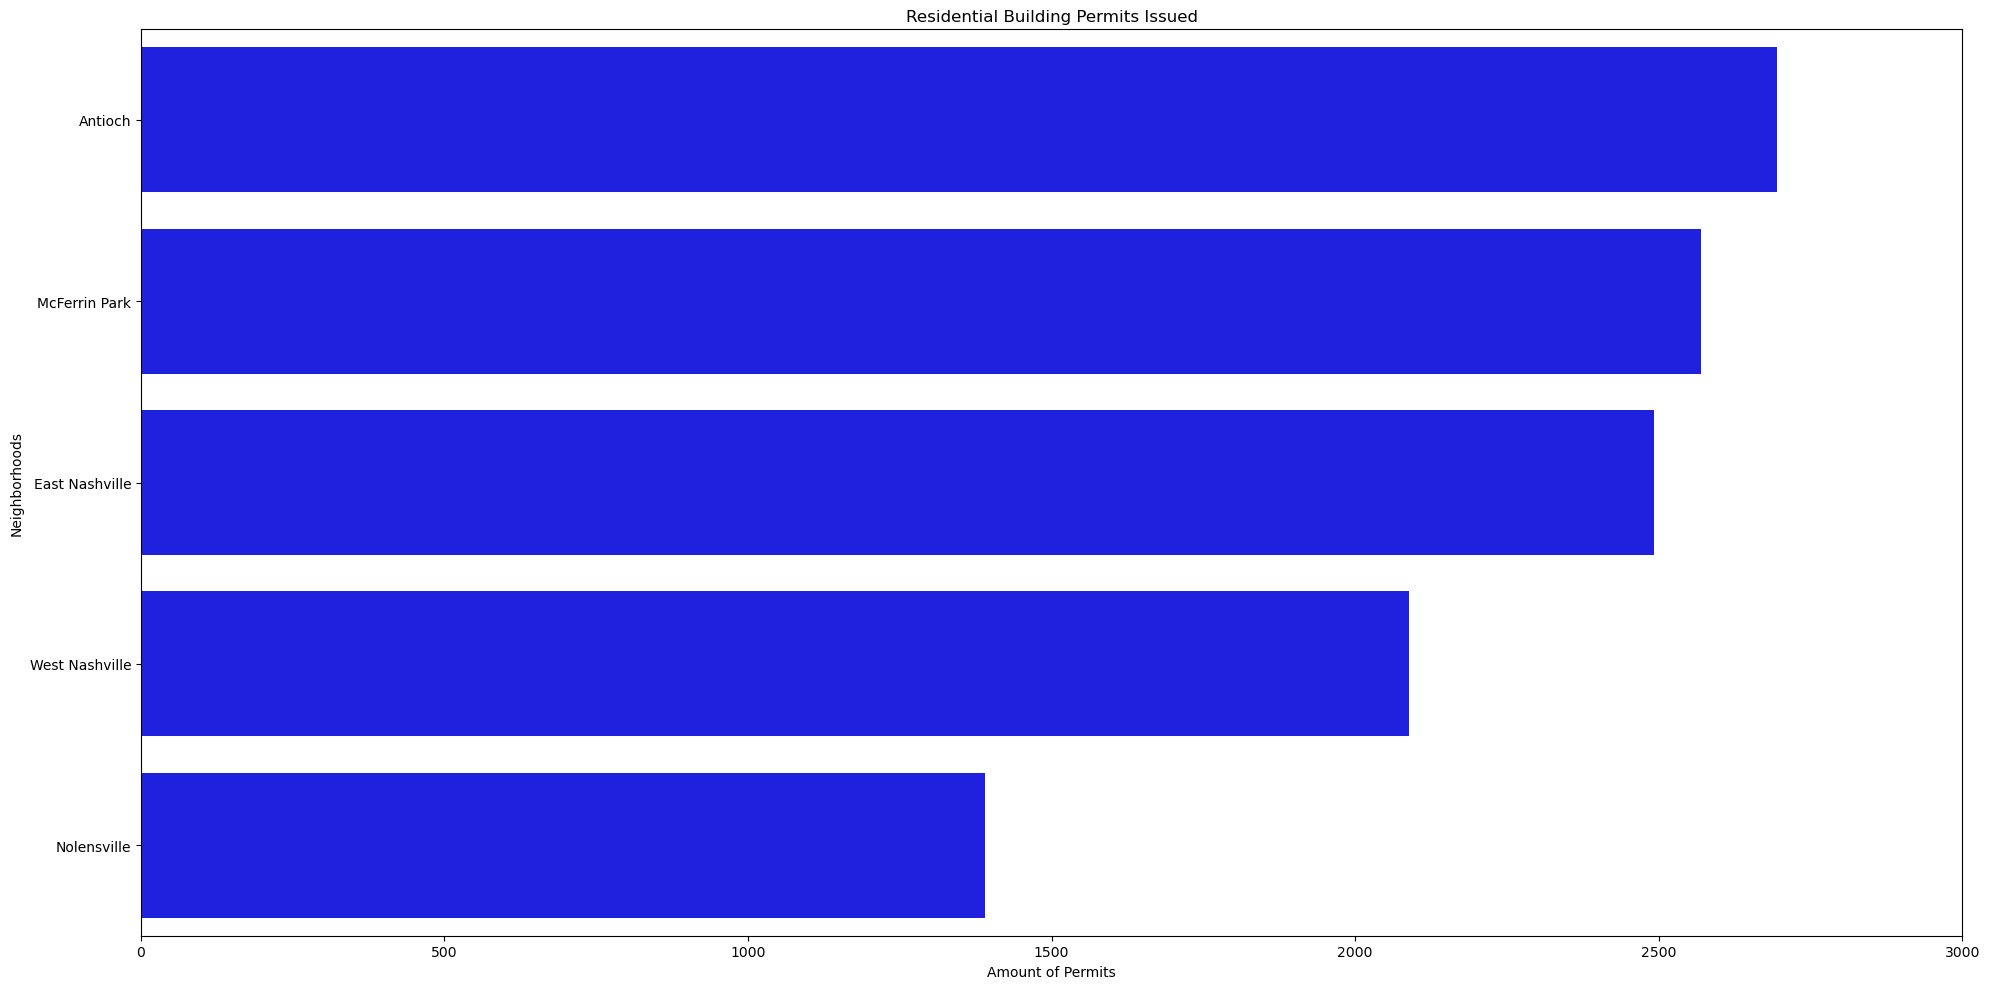

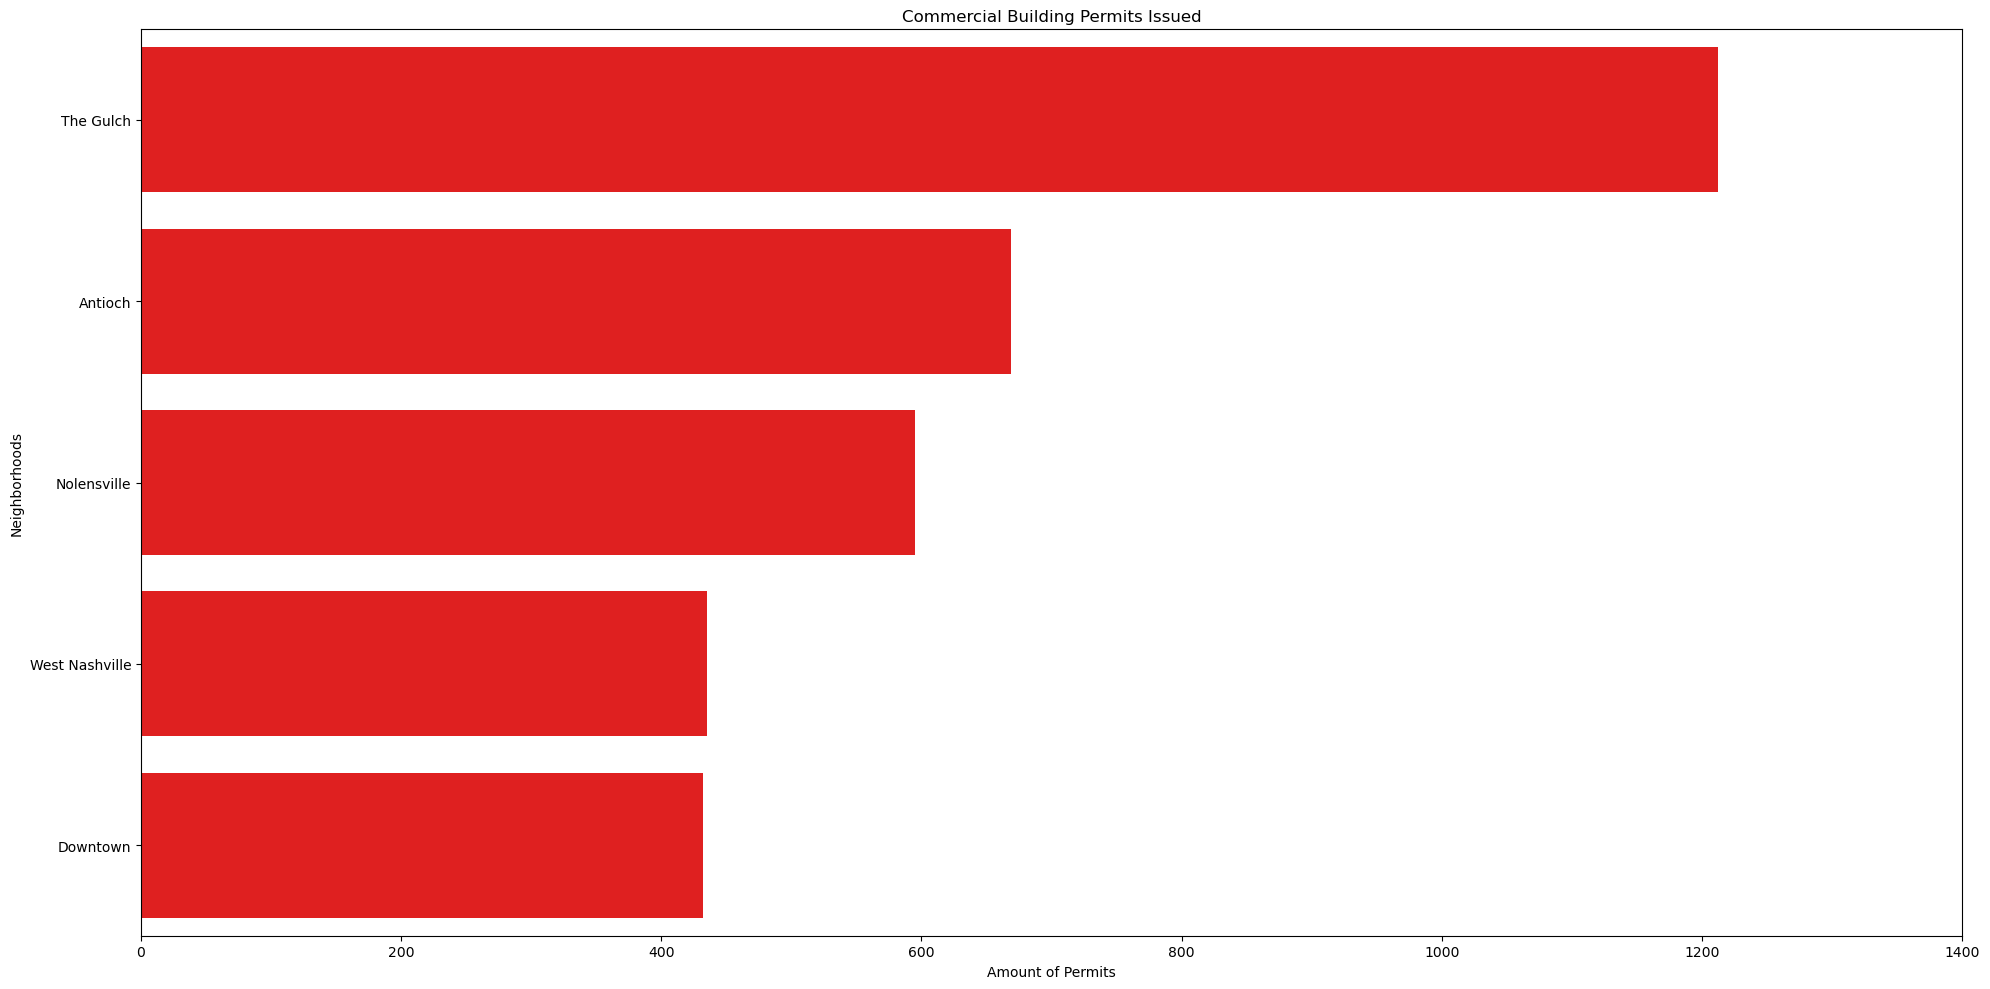

In [69]:
#make  graphs here showing the sum of top 10 residential build and commercial build neighborhoods. Slide 10 in canva.
#this is from the permits issued data
building_counts = nashville.groupby(['Neighborhood', 'building type']).size().reset_index(name='count')
building_counts = building_counts[building_counts['building type'] != 'Other']
residential_data = building_counts[building_counts['building type'] == 'Residential']
commercial_data = building_counts[building_counts['building type'] == 'Commercial']
residential_sum = residential_data.groupby('Neighborhood')['count'].sum().reset_index()
commercial_sum = commercial_data.groupby('Neighborhood')['count'].sum().reset_index()
top_residential = residential_sum.nlargest(5, 'count')
top_commercial = commercial_sum.nlargest(5, 'count')
plt.figure(figsize=(20, 10))
sns.barplot(x='count', y='Neighborhood', data=top_residential, color='blue')
plt.xlim(0, top_residential['count'].max() * 1.5)
plt.xlim(0, 3000)
plt.title('Residential Building Permits Issued')
plt.xlabel('Amount of Permits')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 10))
sns.barplot(x='count', y='Neighborhood', data=top_commercial, color='red')
plt.xlim(0, top_commercial['count'].max() * 1.5)
plt.xlim(0, 1400)
plt.title('Commercial Building Permits Issued')
plt.xlabel('Amount of Permits')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()

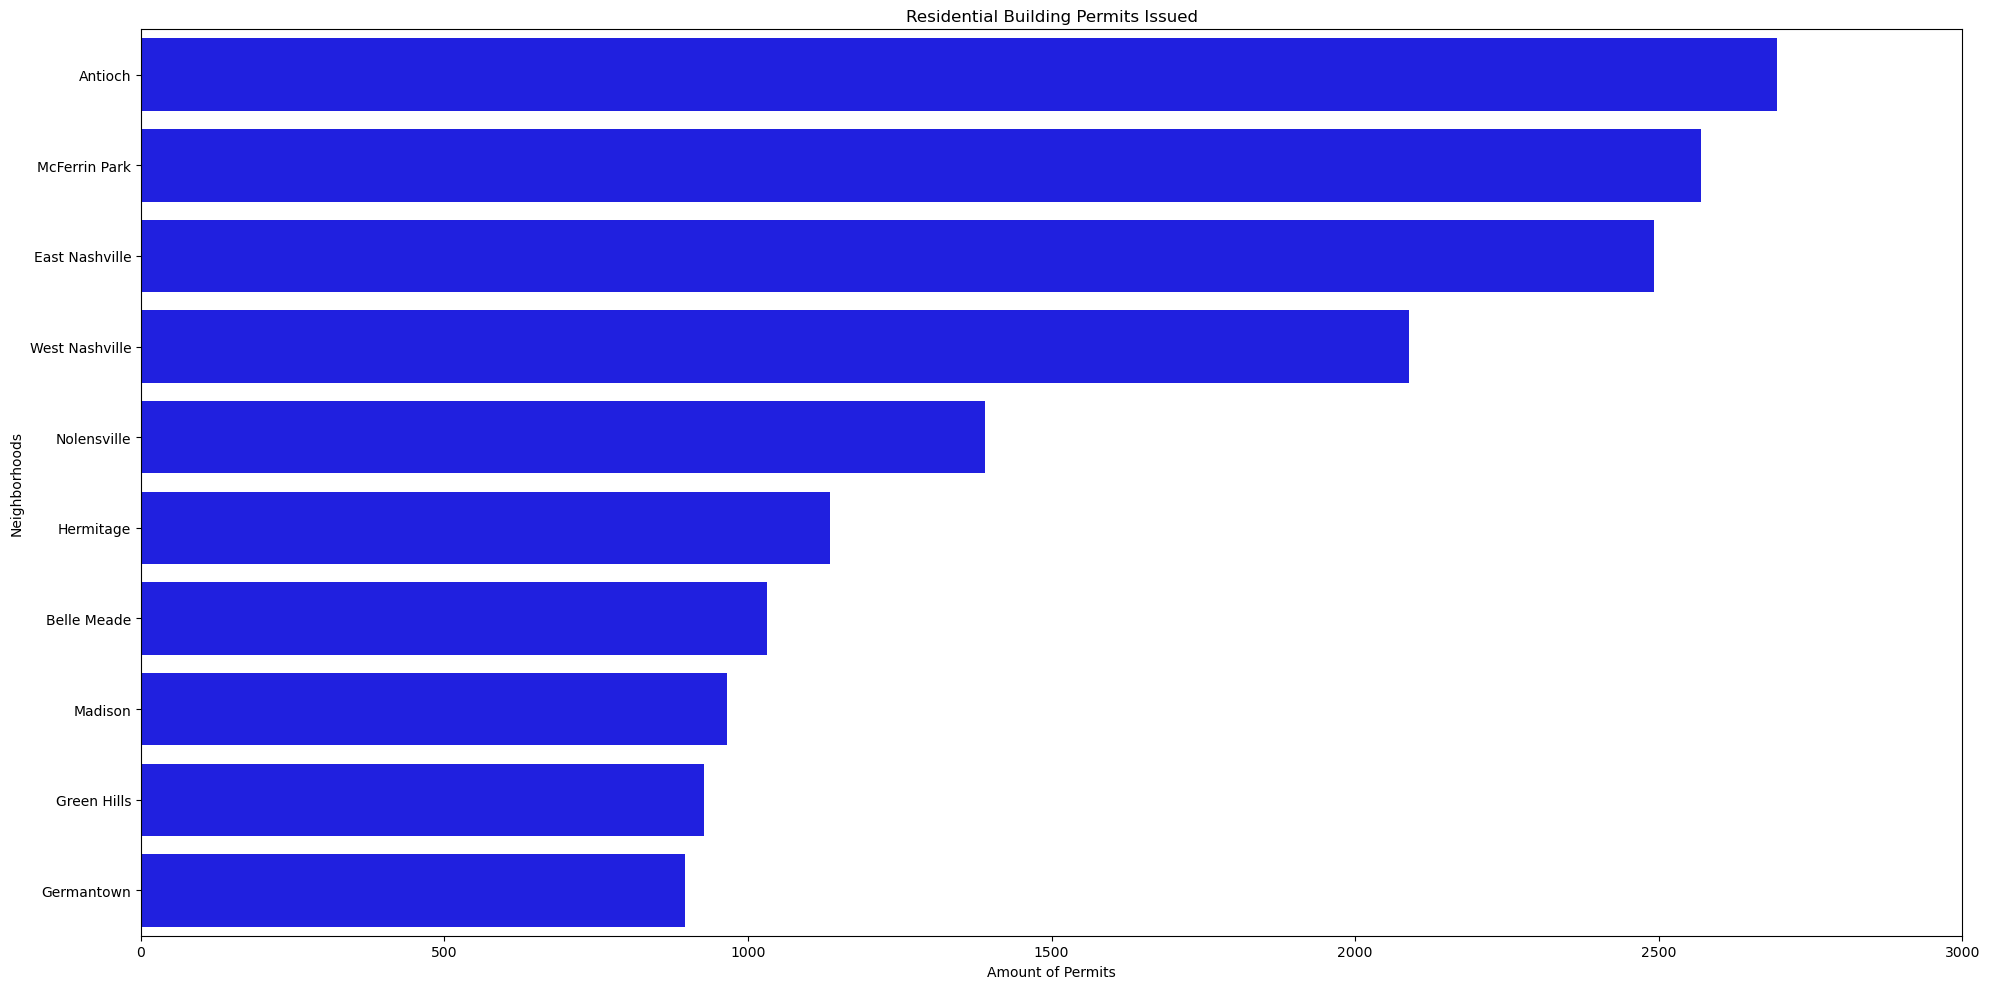

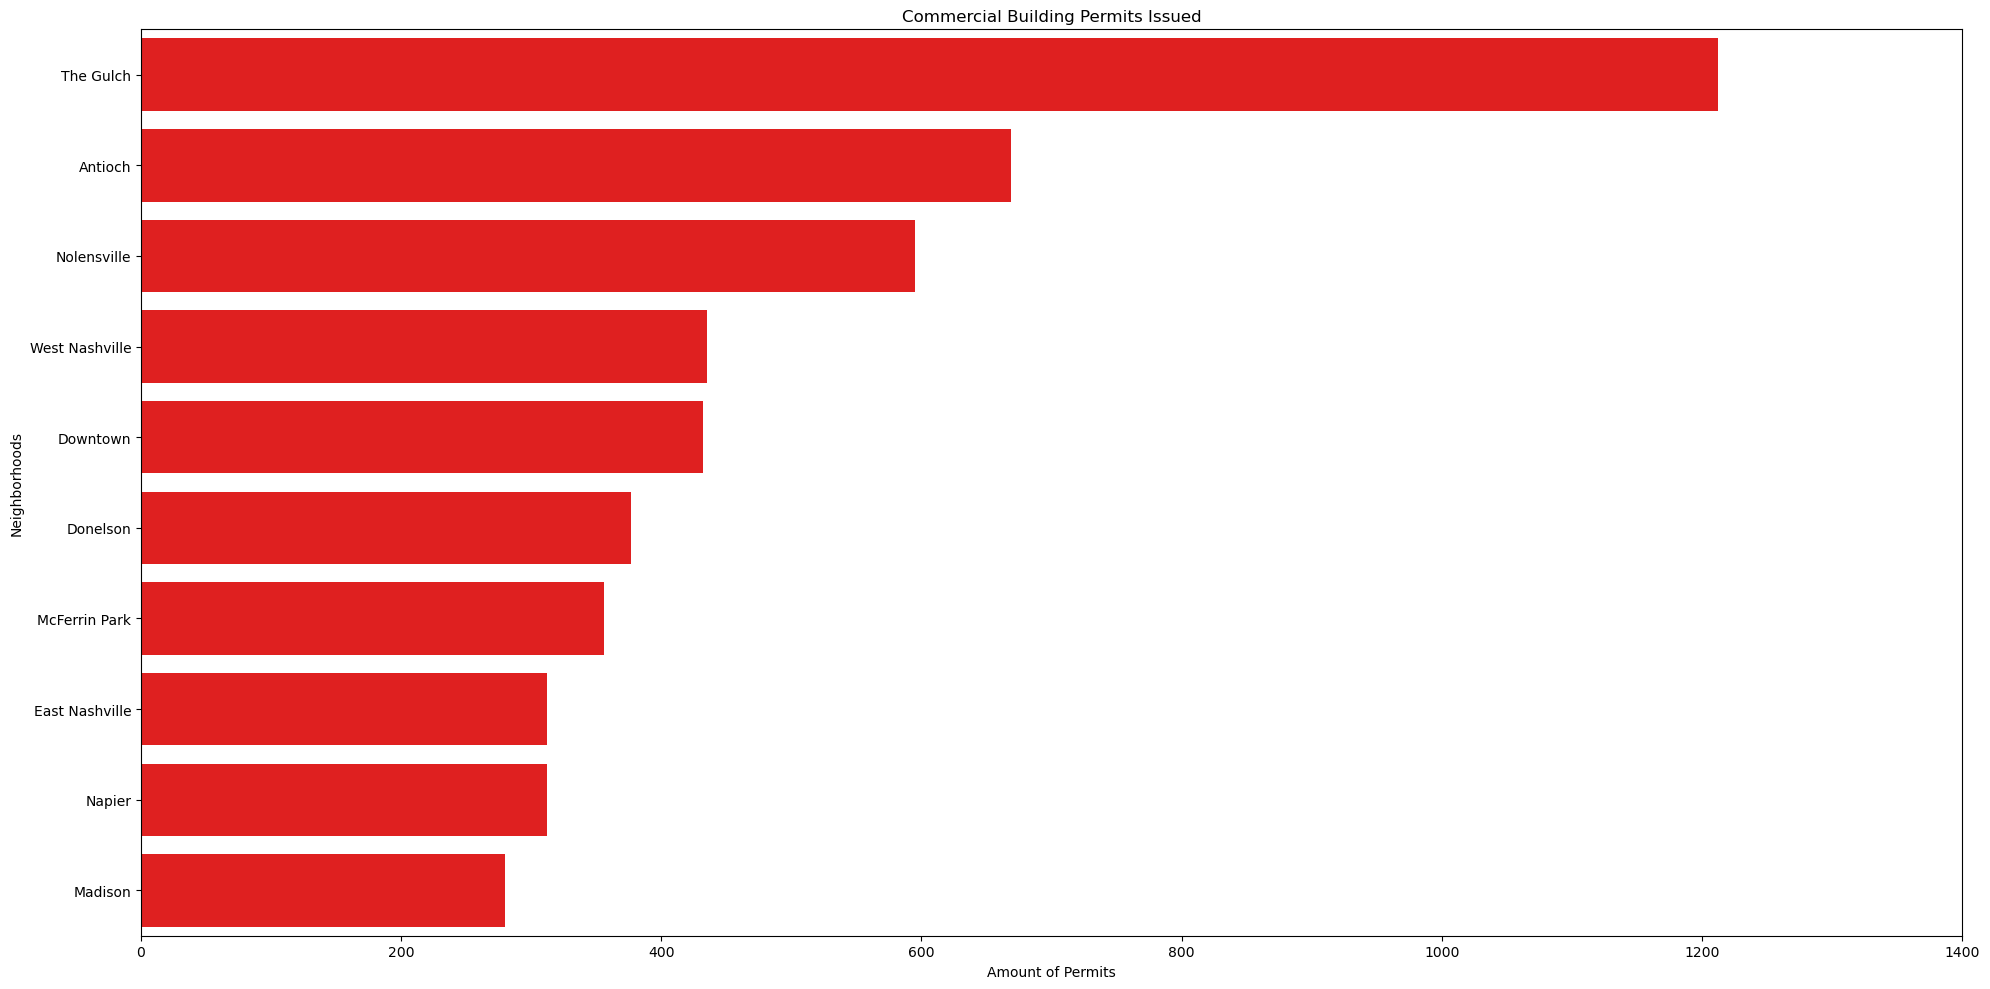

In [70]:
#same graphs as above, just showing top 10 instead of top 5

building_count = nashville.groupby(['Neighborhood', 'building type']).size().reset_index(name='count')
building_count = building_counts[building_counts['building type'] != 'Other']
residential_data = building_counts[building_counts['building type'] == 'Residential']
commercial_data = building_counts[building_counts['building type'] == 'Commercial']
residential_sum = residential_data.groupby('Neighborhood')['count'].sum().reset_index()
commercial_sum = commercial_data.groupby('Neighborhood')['count'].sum().reset_index()
top_residential = residential_sum.nlargest(10, 'count')
top_commercial = commercial_sum.nlargest(10, 'count')
plt.figure(figsize=(20, 10))
sns.barplot(x='count', y='Neighborhood', data=top_residential, color='blue')
plt.xlim(0, top_residential['count'].max() * 1.5)
plt.xlim(0, 3000)
plt.title('Residential Building Permits Issued')
plt.xlabel('Amount of Permits')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 10))
sns.barplot(x='count', y='Neighborhood', data=top_commercial, color='red')
plt.xlim(0, top_commercial['count'].max() * 1.5)
plt.xlim(0, 1400)
plt.title('Commercial Building Permits Issued')
plt.xlabel('Amount of Permits')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()

In [71]:
neighborhood_sums = nashville.groupby('Neighborhood')[['restaurant', 'house', 'multifamily']].sum().reset_index()
neighborhood_sums

,Neighborhood,restaurant,house,multifamily
0,12 South,19,314,25
1,Antioch,48,1634,923
2,Ashland City,0,6,0
3,Belle Meade,11,563,27
4,Bellevue,16,322,92
5,Bordeaux,4,446,153
6,Brentwood,7,328,108
7,Crieve Hall,1,125,1
8,Donelson,56,275,158
9,Downtown,55,4,177


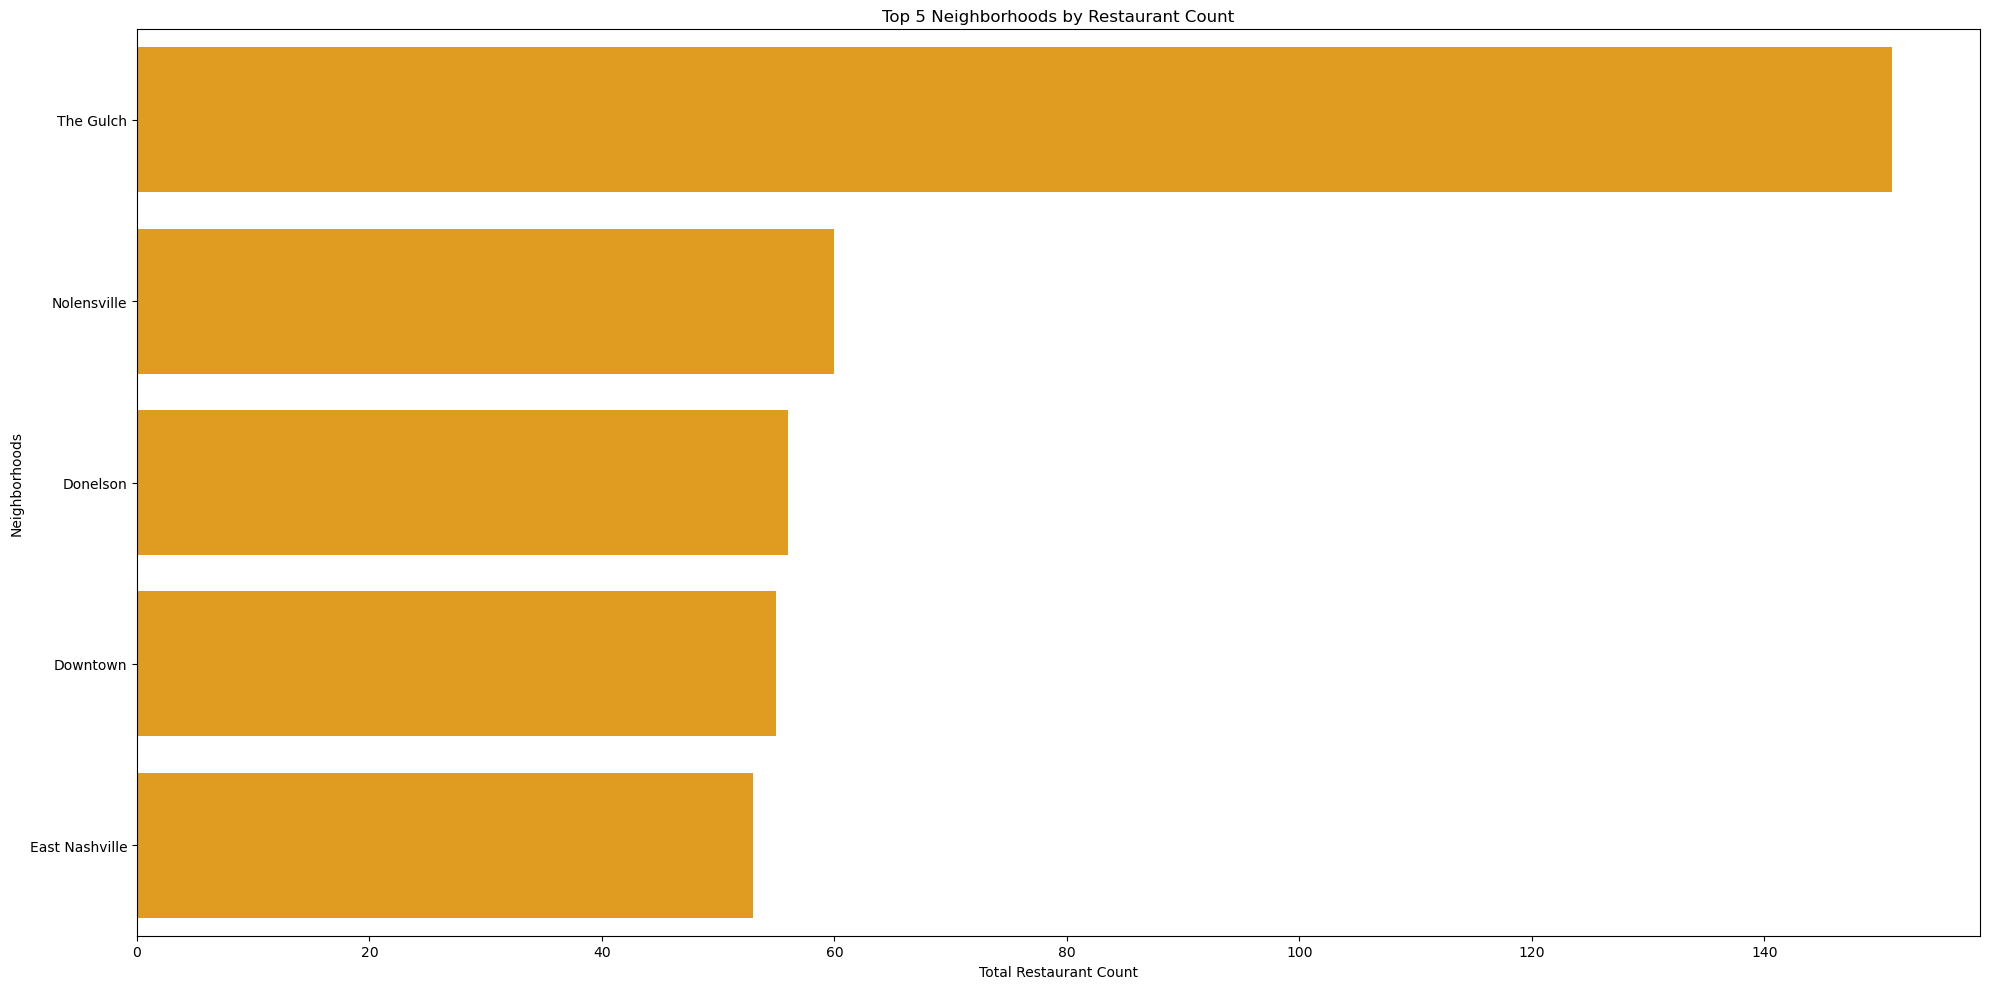

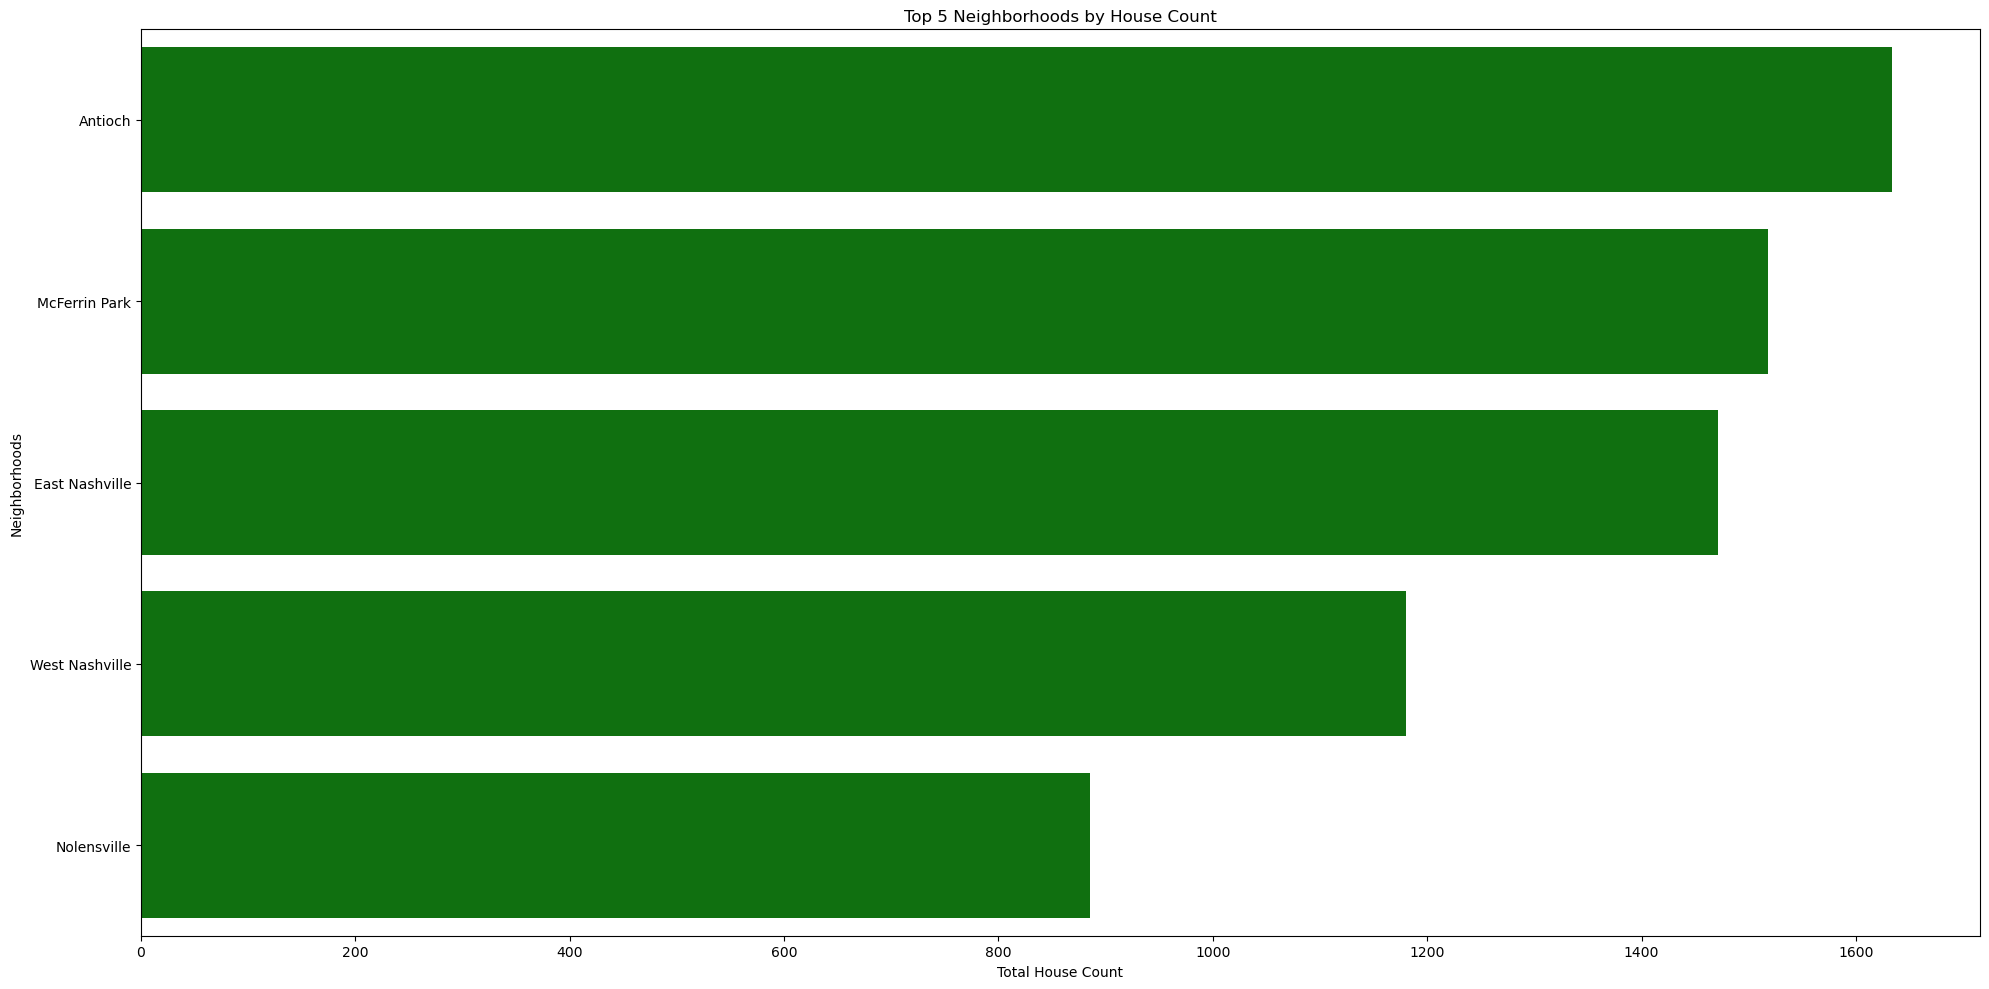

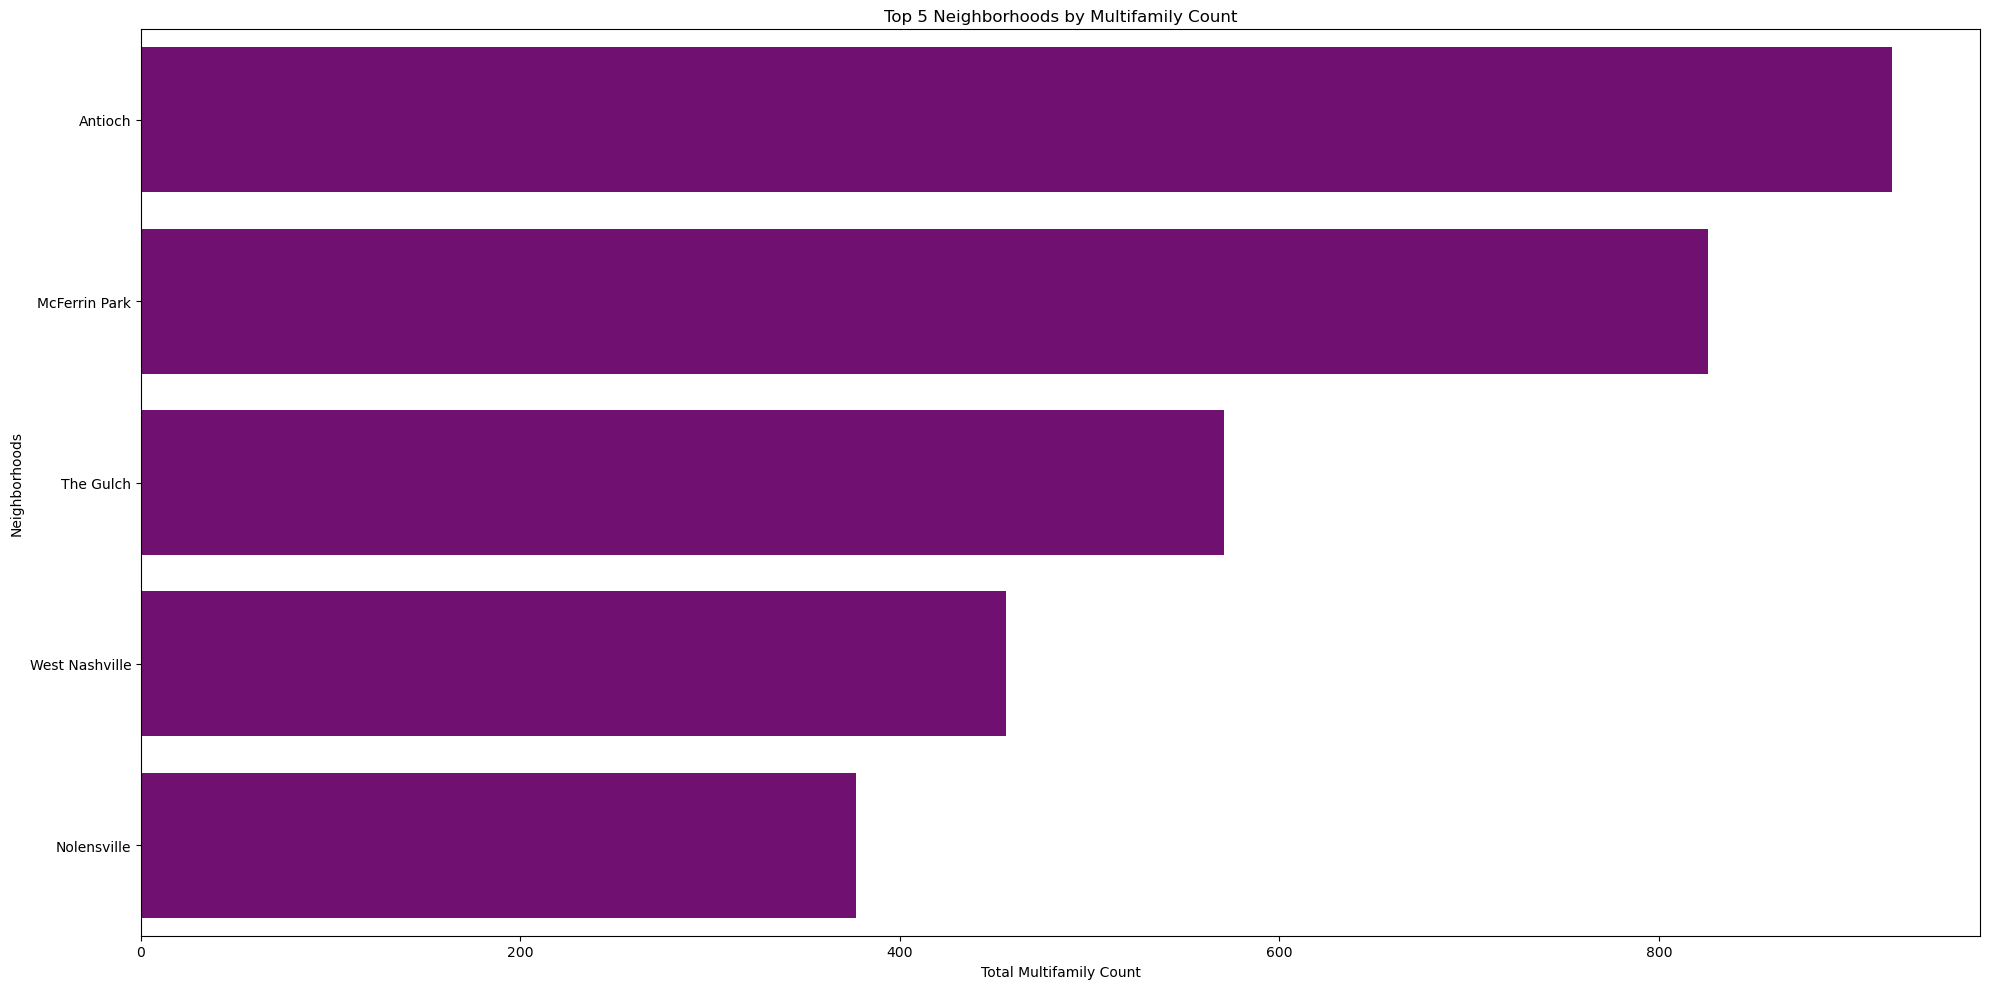

In [72]:

top_restaurant = neighborhood_sums.nlargest(5, 'restaurant')

plt.figure(figsize=(20, 10))
sns.barplot(x='restaurant', y='Neighborhood', data=top_restaurant, color='orange')
plt.title('Top 5 Neighborhoods by Restaurant Count')
plt.xlabel('Total Restaurant Count')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()

top_house = neighborhood_sums.nlargest(5, 'house')

plt.figure(figsize=(20, 10))
sns.barplot(x='house', y='Neighborhood', data=top_house, color='green')
plt.title('Top 5 Neighborhoods by House Count')
plt.xlabel('Total House Count')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()

top_multifamily = neighborhood_sums.nlargest(5, 'multifamily')

plt.figure(figsize=(20, 10))
sns.barplot(x='multifamily', y='Neighborhood', data=top_multifamily, color='purple')
plt.title('Top 5 Neighborhoods by Multifamily Count')
plt.xlabel('Total Multifamily Count')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()



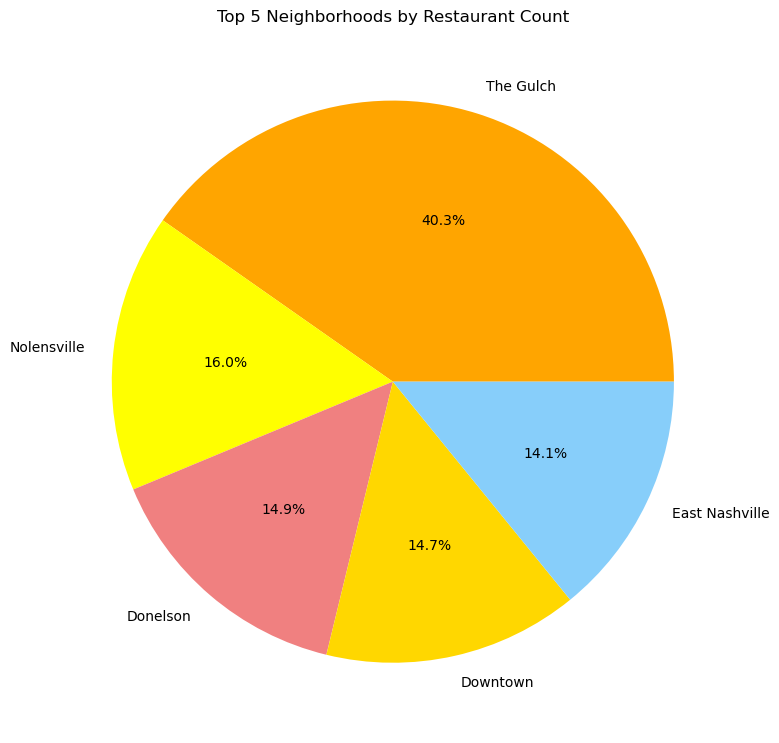

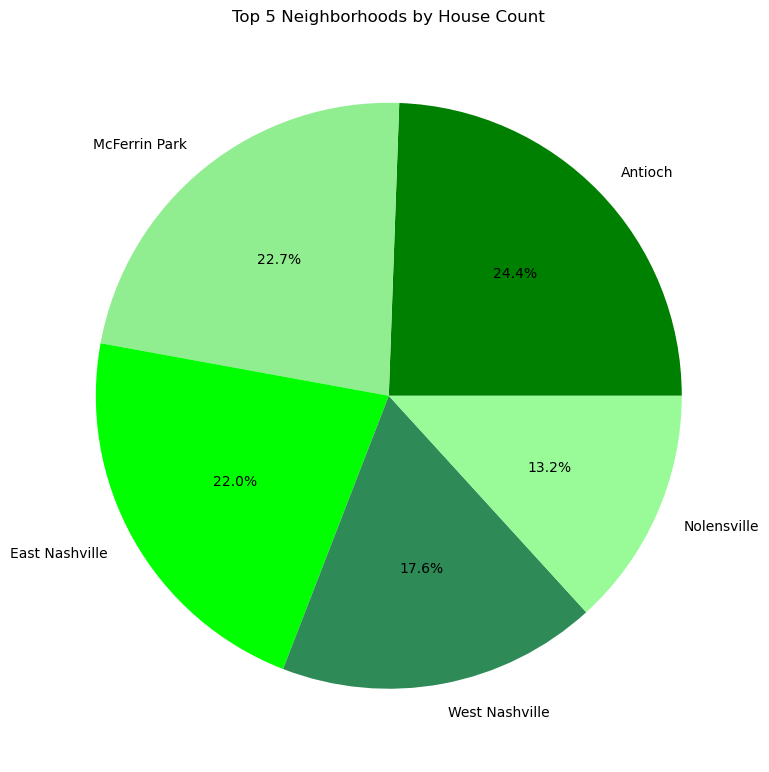

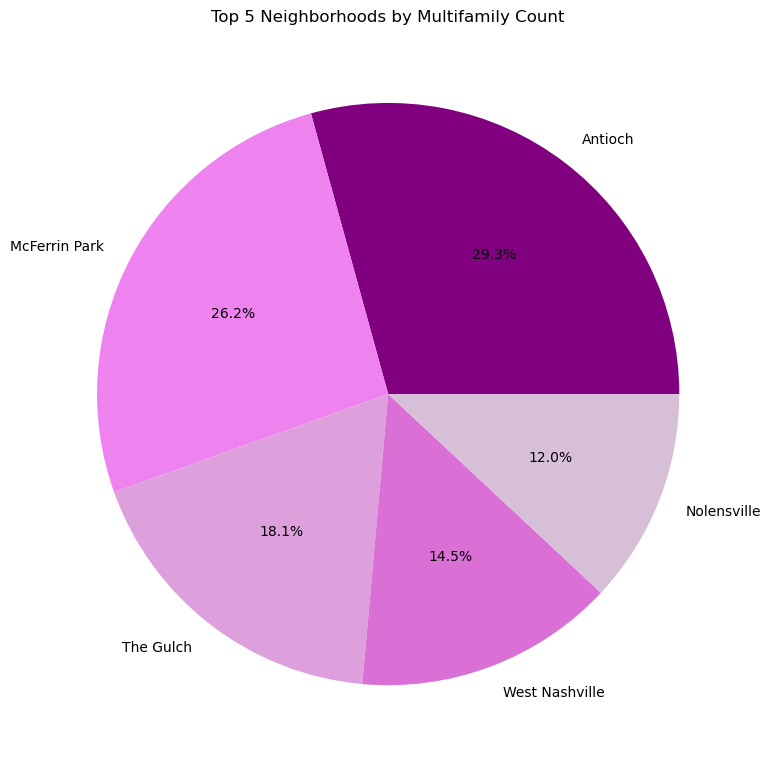

In [73]:
top_restaurant = neighborhood_sums.nlargest(5, 'restaurant')

plt.figure(figsize=(8, 8))
plt.pie(top_restaurant['restaurant'], labels=top_restaurant['Neighborhood'], autopct='%1.1f%%', colors=['orange', 'yellow', 'lightcoral', 'gold', 'lightskyblue'])
plt.title('Top 5 Neighborhoods by Restaurant Count')
plt.tight_layout()
plt.show()

top_house = neighborhood_sums.nlargest(5, 'house')

plt.figure(figsize=(8, 8))
plt.pie(top_house['house'], labels=top_house['Neighborhood'], autopct='%1.1f%%', colors=['green', 'lightgreen', 'lime', 'seagreen', 'palegreen'])
plt.title('Top 5 Neighborhoods by House Count')
plt.tight_layout()
plt.show()

top_multifamily = neighborhood_sums.nlargest(5, 'multifamily')

plt.figure(figsize=(8, 8))
plt.pie(top_multifamily['multifamily'], labels=top_multifamily['Neighborhood'], autopct='%1.1f%%', colors=['purple', 'violet', 'plum', 'orchid', 'thistle'])
plt.title('Top 5 Neighborhoods by Multifamily Count')
plt.tight_layout()
plt.show()

In [74]:
# nashville['date entered'] = pd.to_datetime(nashville['date entered'], format=date_format_entered, errors='ignore')
# nashville['date issued'] = pd.to_datetime(nashville['date issued'], format=date_format_issued, errors='ignore')

# nashville['permit_process_length'] = (nashville['date issued'] - nashville['date entered']).dt.days

# valid_permits = nashville[nashville['permit_process_length'] > 0]

# average_permit_length = valid_permits['permit_process_length'].mean()
# min_permit_length = valid_permits['permit_process_length'].min()
# max_permit_length = valid_permits['permit_process_length'].max()
# median_permit_length = valid_permits['permit_process_length'].median()

In [75]:
nashville['date entered'] = pd.to_datetime(nashville['date entered'], errors='ignore')
nashville['date issued'] = pd.to_datetime(nashville['date issued'], errors='ignore')

nashville['permit_process_length'] = (nashville['date issued'] - nashville['date entered']).dt.days

valid_permits = nashville[nashville['permit_process_length'] > 0]

average_permit_length = valid_permits['permit_process_length'].mean()
min_permit_length = valid_permits['permit_process_length'].min()
max_permit_length = valid_permits['permit_process_length'].max()
median_permit_length = valid_permits['permit_process_length'].median()

/var/folders/gn/whh7gyn95zdg9wlt72r3th3m0000gn/T/ipykernel_44902/2861832904.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  nashville['date entered'] = pd.to_datetime(nashville['date entered'], errors='ignore')
/var/folders/gn/whh7gyn95zdg9wlt72r3th3m0000gn/T/ipykernel_44902/2861832904.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nashville['date entered'] = pd.to_datetime(nashville['date entered'], errors='ignore')
/var/folders/gn/whh7gyn95zdg9wlt72r3th3m0000gn/T/ipykernel_44902/2861832904.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  nashville['date issued'] = pd.to_datetime(nashville['date issued']

In [76]:
average_permit_length

70.09738339745016

In [77]:
min_permit_length

1

In [78]:
max_permit_length

2172

In [79]:
median_permit_length

36.0

In [80]:
invalid_permits = nashville[nashville['permit_process_length'] < 0]
invalid_permits

,permit #,permit type description,permit subtype description,parcel,date entered,date issued,construction cost,address,city,state,subdivision lot,contact,permit type,permit subtype,ivr tracking,purpose,council district,census tract,longitude,latitude,objectid,zip code,x,y,Davidson County Quadrant,Neighborhood,building type,restaurant,house,multifamily,residential,commercial,permit_process_length
16625,2022080626,Building Residential - New,Single Family Residence,08111010500,2023-05-18 05:00:00,2023-05-17 05:00:00,363168,1740 21ST AVE N,NASHVILLE,TN,"PT LT 264 J M, T J & G W HARDING ADDN","JBT CONSTRUCTION, LLC",CARN,CAA01R301,4235307,To construct singles family residence with 256...,21,37013900.0,-86.811341,36.178794,16626,37208,-9663794.325,4325251.087,Northern Davidson County,Germantown,Residential,0,1,0,1,0,-1
29353,2024034638,Building Residential - Building Demolition Permit,Demolition Permit - Residential,08208038800,2024-04-29 05:00:00,2024-04-18 05:00:00,12000,1003 MAXWELL AVE,NASHVILLE,TN,LOT 26 BLOCK F EASTWOOD ADDITION,RESPEN BUILDERS INC,CADM,CAZ01A001,4501137,to demolish existing residence. MHZC must rev...,5,37011900.0,-86.752819,36.183035,29354,37206,-9657279.613,4325835.972,Eastern Davidson County,East Nashville,Residential,0,0,0,1,0,-11


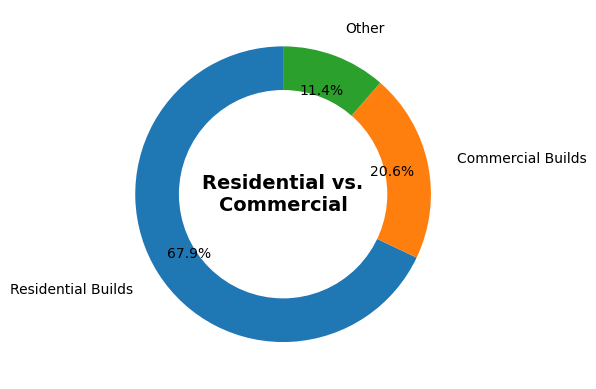

In [81]:
#slide 9
residential_commercial_other = [21881, 6650, 3675]
labels = ['Residential Builds', 'Commercial Builds', 'Other']

plt.pie(residential_commercial_other, labels=labels, autopct='%1.1f%%', startangle=90, 
        labeldistance=1.2, pctdistance=0.75)

my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.text(0, 0, 'Residential vs.\nCommercial', horizontalalignment='center', 
         verticalalignment='center', fontsize=14, weight='bold')

plt.show()
# other = 3675

In [82]:
neighborhood_number = nashville['Neighborhood'].nunique()
neighborhood_number


33

In [83]:
nashville.to_csv('permits_issued_updated.csv', index=False)

In [84]:
nashville

,permit #,permit type description,permit subtype description,parcel,date entered,date issued,construction cost,address,city,state,subdivision lot,contact,permit type,permit subtype,ivr tracking,purpose,council district,census tract,longitude,latitude,objectid,zip code,x,y,Davidson County Quadrant,Neighborhood,building type,restaurant,house,multifamily,residential,commercial,permit_process_length
0,2018034633,Building Residential - New,"Accessory Structure, Pools - Residential",16800024100,2018-06-15 05:00:00,2022-06-06 05:00:00,5700,9025 HESTER BEASLEY RD,NASHVILLE,TN,W OF HESTER BEASLEY RD S OF HWY 100,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARN,CAA14U017,3525071,TO INSTALL A NEW ABOVE GROUND ROUND 24 ft POOL...,35,37018302.0,-87.000154,36.024237,1,37221,-9684812.886,4303956.903,Western Davidson County,Bellevue,Residential,0,0,0,1,0,1452
1,2018074894,Building Commercial - New,"Self Service Storage, Storage Mod Hazard",17500008500,2018-11-29 06:00:00,2022-01-21 06:00:00,8001811,4119 MURFREESBORO PIKE,ANTIOCH,TN,W SIDE MURFREESBORO PK & N OF L & N R R,"CONSECO GROUP INC, THE",CACN,CAF21S001,3582717,to construct a three floor self storage buildi...,32,37015630.0,-86.595138,36.032201,2,37013,-9639726.630,4305053.110,Western Davidson County,Antioch,Commercial,0,0,0,0,1,1149
2,2019015332,Building Commercial - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",10404017300,2019-03-15 05:00:00,2021-12-09 06:00:00,21960364,1005 16TH AVE S,NASHVILLE,TN,PT LOTS 1 2 3 4 SHIELDS SUB 5 6 ROKEBY,"ANDERSON, R G CO INC",CACN,CAA03R399,3629991,"to construct a 72,772 sf mixed use building wi...",17,37016400.0,-86.792689,36.146449,3,37212,-9661717.906,4320791.252,Western Davidson County,West End,Commercial,0,0,1,0,1,1000
3,2019052492,CAUO,"Multifamily, Tri-Plex, Quad, Apartments",09207033900,2019-08-30 05:00:00,2022-03-23 05:00:00,50,640 21ST AVE N,NASHVILLE,TN,PT LTS 39-42 W B COOPERS ADDN & ADDITIONAL ACR...,"WP TENNESSEE BUILDERS, LLC",CAUO,CAA03R398,3707454,master permit no construction this permit con...,21,37014400.0,-86.805831,36.159317,4,37203,-9663180.855,4322565.299,Western Davidson County,The Gulch,Other,0,0,1,0,0,936
4,2019058786,CAUO,"Multifamily, Townhome",082120R90000CO,2019-09-26 05:00:00,2022-09-07 05:00:00,50,119 E NEILL AVE,NASHVILLE,TN,COMMON AREA HOMES AT 119 NEILL AVENUE,HARPETH VALLEY HOMES LLC,CAUO,CAA03R301,3716522,Master permit for Neill Avenue Townhomes with ...,5,37011900.0,-86.758634,36.177835,5,37206,-9657927.015,4325118.842,Eastern Davidson County,East Nashville,Other,0,0,1,0,0,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32201,2024087813,CASN,Sign - Ground / Wall Signs,09202000200,2024-09-27 05:00:00,2024-09-27 05:00:00,217600,1107 ED TEMPLE BLVD SIGN ACROS,NASHVILLE,TN,P/O LOTS 7 THRU 12 BLK 1 MIDWAY,JARVIS AWARD SIGN AND FLAG CO,CASN,CAZ02A001,4591244,"To erect/replace 1 illuminated, 417sqft, pylon...",21,37013602.0,-86.821419,36.168904,32202,37208,-9664916.178,4323887.267,Northern Davidson County,Germantown,Other,0,0,0,0,0,0
32202,T2022070823,Building Residential - New,Pool without a fence,11512010100,2022-10-18 05:00:00,2022-10-26 05:00:00,0,6044 B BRESSLYN RD,NASHVILLE,TN,LOT 14 RESUB. OF WEST MEADE VILLAGE,gene kulas,CARN,CAAPOOLFC,4219223,to construct 20x40 swimming pool with hot tub ...,23,37018203.0,-86.878708,36.113343,32203,37205,-9671293.589,4316228.471,Western Davidson County,Belle Meade,Residential,0,0,0,1,0,8
32203,T2023042807,Building Residential - Rehab,Demo Permit - Residential Accessory,081162E00100CO,2023-06-29 05:00:00,2023-06-29 05:00:00,5000,1042 A2 SCOVEL ST,NASHVILLE,TN,UNIT A 1042 SCOVEL STREET,CDM Construction,CARR,CAZ01A003,4343181,We are removing the concrete slab inside the g...,19,37019400.0,-86.797741,36.172862,32204,37208,-9662280.302,4324433.046,Northern Davidson County,Germantown,Residential,0,0,0,1,0,0
32204,T2023042806,Building Residential - Rehab,Demo Permit - Residential Acce